# OLG Model with extension Pay-as-you-go system

## Import of packages and extensions

In [1]:
#Reloading packages every time a cell is run
%load_ext autoreload
%autoreload 2

#Loading packages
import numpy as np
import scipy as sp
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

# Enables sympy to write functions as math
sm.init_printing()

#Makes plots non-interactive
%matplotlib inline

## Intro

**What we do**

We will examin the Over Lapping Generation (OLG) model. First the genereal setup of the model will be analyzed analytically. Here we derive the different equations of the model ending up with the capital accumulation function for $k^*$. This is then calculated and compared to a numuerical sollution of the model. Aferwards we visualize the transition curve and extend the model to consider a Pay As You Go (PAYG) system. For this model we also find the sollution of the cappital accumulation function and visualize the transiontion to steady state. 

**About the OLG model**

The OLG model considers agents who lives for two generations, the young and the old. The young work and save. The old can not work and must therefore live from what they have saved in the first period. As the model considers ramsey optimizing agents they have one utility function describing both their utility in period t and t+1. This implies the old consume all their captial and savings.

# Baseline OLG Model setup

The economy is populated by agents that live for two discrete periods $t$ and $t_{+1}$. $L_t$ individuals are born in period $t$ and we assume the population grows at a constant rate $n$, so:

$$L_t = L_{t-1}(1+n)$$

This means that there are $L_t$ (young people) and $L_{t-1}=\frac{L_t}{(1+n)}$ (old people) alive in period $t$

In [2]:
# Young and old people alive in period t
[Lty, Lto] = sm.symbols('L_t L_t-1')

# Population groth rate, n
n = sm.symbols('n')

In [3]:
# Defining the equation
Lty = Lto*(1+n)

**Budget constraints**

Agents work when they're young and they supply 1 unit of labor inelastically at wage rate $w_t$. They split the labor income between consumption $c_{1t}$ and savings $s_t$ and retire when old and just consume their gross savings. We let $r_{t+1}$ denote the interest rate between $t$ and $t+1$.

In [4]:
# Defining wage rate, savings and interest rate parameters
[wt, st, rt1] = sm.symbols('w_t s_t r_t+1')

The budget constraint in each period of life is given as:

$$ \text{Young}: c_{1t}+s_t = w_t $$
$$ \text{Old}: c_{2t+1}=(1+r_{t+1})s_t $$

In [5]:
# Consumption when young at time t and when old at time t+1
[c1t, c2t1] = sm.symbols('c_1t c_2t+1')

# Discount rate and factor
rho = sm.symbols('rho')
discfac = (1/(1+rho))

In [6]:
# Defining the equations
ybc = c1t + st - wt # Young budget constraint
ybc_help = sm.Eq(c1t + st - wt,0) # Young budget constraint help
obc = (1+rt1)*st - c2t1
obc_help = sm.Eq((1 + rt1)*st - c2t1,0) # Old budget constraint



By substituting out savings, $s_t$ we can get the intertemporal budget constraint (IBC):

$$c_{1t}+\frac{c_{2t+1}}{(1+r_{t+1})}=w_t$$

In [7]:
# Solving for st in ybc, "Young budget constraint"
ybc_s = sm.solve(ybc, st) [0] #Young budget constraint isolated savings


In [8]:
# Substituting out savings
IBC_help = obc.subs(st, ybc_s) #Intertemporal constraint equal 0
# Isolating wt in the intertemporal budget constraint
IBC_wt = sm.solve(IBC_help, wt) [0] #Intertemporal constraint isolated wage

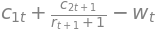

In [9]:
IBC = (c1t + (c2t1/(1+rt1) - wt))
IBC

**Preferences**

Agents derive utility from consumption while they're alive given as:

$$U_t=u(c_{1t})+\frac{1}{1+\rho}u(c_{2t+1})$$

We make our first assumption on functional forms, such that the utility of consumption is logarithmic, this means that all agents in the economy is risk averse.

$$U(c) = log(c)$$

In [10]:
# defining overall utility
Ut = sm.symbols('U_t')

# Utility in the two periods
[u1,u2] = sm.symbols('u1 u2')

In [11]:
# Defining the equation
uc1 = sm.log(c1t) # Utility for consuming when young
uc2 = sm.log(c2t1) # Utility for consuming when old

In [12]:
Ut = uc1 + discfac*uc2 # Overall consuming utility

Where:\
$
c_{1t}: \text{Consumption when young at time t}\\
c_{2t+1}: \text{Consumption when old at time t+1}\\
\rho: \text{Discount rate}\\
\frac{1}{1+\rho}: \text{Discount factor}
$

**Maximization problem**

Agents born at time $t$ solve the following maximization problem

$$\max_{\substack{c_{1t} \\ c_{2t+1}}} u(c_{1t})+\frac{1}{1+\rho}u(c_{2t+1})$$

Subject to the intertemporal budget constraint (IBC)

$$c_{1t}+\frac{c_{2t+1}}{(1+r_{t+1})}=w_t$$

The intial old make no choices and fully consume their wealth.

**Firms and production**

The firms are profit optimizing and hereby need to maximize the following function: $$\max_{K_t, L_t} Y_t - r_tK_t - w_tL_t$$

Where $Y_t$ is a Cobb-Douglas production function: $$Y_t = K_t^\alpha L_t^{(1-\alpha)}$$

In [13]:
#Variables in the production function.
[K_t, L_t] = sm.symbols('K_t L_t') 
delta = sm.symbols('delta')
#capital in the two periodes, both capital per unit of labor aswell as the overall capital and the capital per unit of labor in the steady state.
[kt, k2t, K, kss] = sm.symbols('k_t k_t+1 K kss')
#the parameters used in the model.
[alpha, rho, sigma, slambda] = sm.symbols('alpha rho sigma lambda')

In [14]:
#Defining the Cobb-Douglas production function:
Y = K_t**alpha*L_t**(1-alpha)
Y

By differentiating Y_t with regards to $K_t$ and $L_t$ it is possible to derive the level of $r_t$ and $w_t$

In [15]:
r_t = sm.diff(Y,K_t) #deriving with regards to K_t
r_t = sm.simplify(r_t) #sharpening the model
r_t #display

In [16]:
w_t = sm.diff(Y,L_t) #deriving with regards to K_t
w_t = sm.simplify(w_t) #sharpening the model
w_t #display

We want to express these equations per unit of labor

In [17]:
rpl_help = sm.Eq(rt1,(alpha*kt**(alpha-1)))
rpl_help



In [18]:
rpl = alpha*kt**(alpha-1)

In [19]:
wpl_help = sm.Eq(wt,((1-alpha)*kt**alpha))
wpl_help


In [20]:
wpl = kt**alpha*(1-alpha)

**Characterizing solution to household problem**

We set up the Lagrangian

$$L = u(c_{1t})+\frac{1}{1+\rho}u(c_{2t+1})+\lambda[w-c_{1t}-\frac{c_{2t+1}}{1+r_{t+1}}]$$

In [21]:
# Defining the Lagrangian
L = sm.symbols('L')
slambda = sm.symbols('lambda')

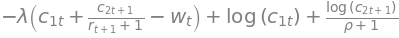

In [22]:
# Defining the equation
Lagr = Ut - slambda*IBC
Lagr

Now we take the first order condition w.r.t. consumption in period $t$, $t+1$ and $\lambda$

In [23]:
# Taking the first order conditions of the Lagrangian
def FOC(x):
    Lagr_1 = sm.diff(Lagr, x)
    Lagr_2 = sm.Eq(Lagr_1,0) 
    Lagr_3 = sm.solve(Lagr_2, slambda) [0]
    return Lagr_3

# The first order condition for c_1t and c_2t1
Lagr_c1 = FOC(c2t1) # FOC of consumption for young in period 1
Lagr_c2 = FOC(c1t) # FOC of consumption for old in period 2

Now we substitute the Lagrangian multiplier to get the Euler equation:

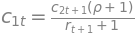

In [24]:
# Getting the Euler Equation
Euler_help = sm.Eq(Lagr_c1, Lagr_c2)
Euler_help = sm.solve(Euler_help, c1t) [0]
Euler = sm.Eq(c1t, Euler_help)
Euler

The Euler equation describes how marginal utilities of consumption between young and old are optimally related. We equate the marginal cost of giving up a unit of consumption today with the marginal benefit of consuming it (plus interest) tomorrow. 

**From consumption to savings**

Now we turn from optimal consumption to the optimal savings. Now we combine the budget constraints

$$c_{1t}+s_t=w_t$$

In [25]:
# Defining the budget constraint for young and old for consumption
ybc_c1t = wt-st # Budget constraint for young
obc_c2t1 = (1+rt1)*st # Budget constraint for old

$$c_{2t+1}=(1+r_{t+1})s_t$$

with the Euler equation from before:

$$c_{1t}=\frac{c_{2t+1}(\rho+1)}{r_{t+1}+1}$$

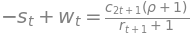

In [26]:
# Substituting the budget constraints into the Euler equation
s1 = Euler.subs(c1t,ybc_c1t)
s2 = s1.subs(c2t1, obc_c2t1)
s1

Now we substitute out consumption to find the optimal saving:

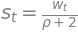

In [27]:
# Substituting out consumption
s_help = sm.solve(s2,st) [0]
os_help = sm.Eq(st,s_help)
os_help


Due to the log utility there doesn't exist any substitution and income effects, which means that we save a constant fraction of labor income. 

Instead of showing the optimal saving by the wage, we substitute the capital accumulation in.

In [28]:
os = wt/(rho+2)

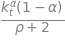

In [29]:
optsaving = os.subs(wt, wpl)
optsaving

**A note on aggregation**

Once we know individual decisions, we can find out the aggregates in the OLG setting. We start by aggregate savings. As only the young save, and there are $L_t$ of them we get:

$$S_t=s_tL_t$$

Aggregate capital stock in $t+1$: 

(i) Saving by the young: $S_t$ <br> 
(ii) Dissaving by the old, where they consume all their savings: $-(1-\delta)K_t)$ <br>
(iii) Un-depriated capital carried over from t, which is still employed by the firm: $(1-\delta)K_t)$ <br>
Which gives us:

$$K_{t+1}=S_t-(1-\delta)K_t+(1-\delta)K_t$$ <br> $$\leftrightarrow  K_{t+1} = S_t$$ <br> $$\leftrightarrow \frac{K{t+1}}{L_t} = \frac{S_t}{L_t}$$ <br> $$\leftrightarrow \frac{K_{t+1}}{L_{t+1}}*\frac{L_{t+1}}{L_t}=s_t $$ <br> $$\leftrightarrow k_{t+1}(1+n)=s_t $$

Therefore the capital accumulation per worker becomes:

$$k_{t+1}(1+n)=s_t=\frac{w_t}{2+\rho}=\frac{k_t^\alpha(1-\alpha)}{\rho+2}$$

This shows that depreciation does not affect the saving in the genereal model.

**Steady state**

We know that in steady state the capital is: $$k_{t+1} = k_t = k^*$$

In [30]:
# Defining steady state capital
k_star = sm.symbols('k^*')

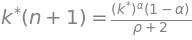

In [31]:
# Defining the Capital accumulation equation with k_star
capa = sm.Eq(k_star*(1+n), (((k_star**alpha)*(1-alpha))/(rho+2)))
capa

The steady state in the General OLG model is:


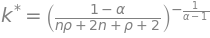

In [32]:
#Solving for steady state k_star
ss = sm.Eq(k_star,(((1-alpha)*(k_star**alpha))/((2+rho)*(1+n))))
kss = sm.solve(capa, k_star)[0]
print(f'The steady state in the General OLG model is:')
display(sm.Eq(k_star,kss))

## Analytical solution

In [33]:
# Solves transition curve to find SS k
ss = sm.Eq(k_star,(((1-alpha)*(k_star**alpha))/((2+rho)*(1+n))))
kss = sm.solve(ss,k_star)[0]
k = sm.symbols('k^*')


In [34]:
ss_func = sm.lambdify((alpha,n,rho),kss)

$\alpha$ is capitals share of production. Widely it is considered to be 1/3

n is the population growth. According to Statistics Denmark the growth of the danish population was 0,4pct. in 2018

$\rho$ is how much a person prefer consumption today relative to tomorrow. We arbitrarly set it to 0.1

In [35]:
# Solves SS for k, given input
ss_func(1/3,0.004,0.1)

## Nummerical solution

In [36]:
# Defines global values for parameters
alpha = 1/3
n = 0.004
rho = 0.1

In [37]:
obj_kss = lambda kss: kss - ((1-alpha)*(kss**alpha))/((2+rho)*(1+n))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
result

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.17780075471666412

We see that both the analytical and nurmerical solution is $k^*=0.1778$

## Visualization

We isolate $k_{t+1}$ in the capital accumulation per worker equation

$$k_{t+1}=\frac{k_t^\alpha(1-\alpha)}{(\rho+2)(1+n)}$$

Now we plot.

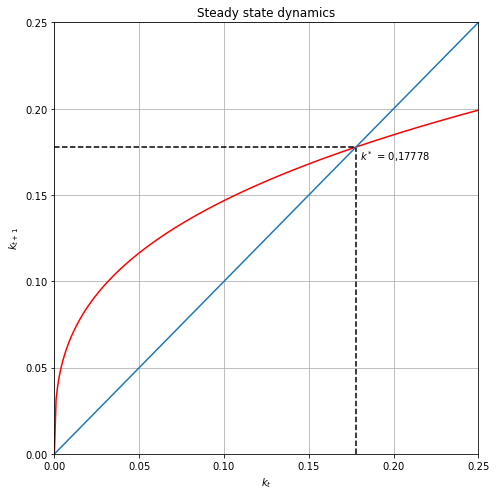

In [38]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

def f_gen(k_t):  
        """ Capital transition function
    args:
        k_t (array): Capital at time t
        Parameters
    return:
        k_{t+1} (float): Capital in period t+1
    """
        return ((k_t**alpha)*(1-alpha))/((rho+2)*(1+n))

k_t = np.linspace(0, 1, 1000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Steady state dynamics')
ax.plot(k_t, f_gen(k_t), color='red')
ax.plot(k_t, k_t)

plt.grid()
ax.set_xlim([0,0.25])
ax.set_ylim([0,0.25])
ax.set_xlabel('$k_t$')
ax.set_ylabel('$k_{t+1}$')
plt.text(0.18,0.17,'$k^*$ = 0,17778')

ax.axhline(y=0.17778, xmin=0.0, xmax=0.71, color='black', linestyle='dashed')
ax.axvline(x=0.17778, ymin=0.0, ymax=0.71, color='black', linestyle='dashed')

plt.show()

# Further analysis - PAYG

We now extend a Pay As You Go (PAYG) social security system. In the PAYG system the goverment raises a contribution from the current young, $d_t$, and pays it to the current old. 

## Description of the model extension

The agents pay $d_t$ in period t and recive $b_{t+1}$ in period t+1

$$ b_{t+1} = (1+n)d_t$$

The budget constraint for the young in period t is:
    $$c_{1t}=w_t-s_t-d_t$$

Budget constraint for when the young are old in period t+1

$$c_{2t+1}=(1+r_{t+1})s_t+b_{t+1}=(1+r_{t+1})s_t+(1+n)d_{t+1}$$

The agents do not choose $d_t$ and therefore take it as given. The Euler equation is therefore unchanged:

$$u'(c_{1t})=\frac{1+r_{t+1}}{1+\rho}u'(c_{2t+1})$$

Aggre saving are now given as:

$$s_t=(1+n) k_{t+1}$$

Note that the contributions are not transferred across time in this system, so they don’t contribute to capital accumulation. That’s why we don’t have: $$s_t+d_{t+1}$$

The transiation curve is given as:

$$\frac{K_{t+1}}{L_{t+1}}=k_{t+1}=\frac{{(1-\alpha)k^\alpha_t(1-d)-(1-\alpha)k^\alpha_{t+1}d\frac{(1+\rho)(1+n)}{1+\alpha k^{\alpha-1}_{t+1}-\delta}}}{(1+n)(2+\rho)}$$

## Numerical solution of the OLG with PAYG

We need to specify the $\delta$ and d

$\delta$ is the yearly depreciation. It has over a long time been 2pct. For assume that for now.

d is the of the current youngs wage going to the current old. This is arbitraily set to 0,15.

In [39]:
delta = 0.02
d = 0.15

In [40]:
# Solves the numerical solution
trans_PAYG = lambda k_payg, n, rho, alpha, d, delta: ((1-alpha)*k_payg**alpha*(1-d)-(1-alpha)*k_payg**alpha*d*(((1+rho)*(1+n))/(1+alpha*k_payg**(alpha - 1)-delta)))/((1+n)*(2+rho))

obj_f_PAYG = lambda x, n, rho, alpha, d, delta: x - trans_PAYG(x, n, rho, alpha, d, delta)
result_payg = optimize.root_scalar(obj_f_PAYG, args=(n, rho, alpha, d, delta), bracket=[0.1,100],method='brentq')
result_payg

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.12224767500245008

We now find $k^*_{PAYG}=0.1222$. With the defiend variables the genereal model has more capital accumulating.

## Visualization of extended model

In [41]:
def f_PAYG(k_payg):
        """ Capital transition function
    args:
        k_payg (): Capital at time t in the PAYG model
    return:
        k_{t+1} (float): Capital level reached reached in perod t+1 given the capital level in period t
        """
        return ((1-alpha)*k_payg**alpha*(1-d)-(1-alpha)*k_payg**alpha*d*(((1+rho)*(1+n))/(1+alpha*k_payg**(alpha - 1)-delta)))/((1+n)*(2+rho))
k_payg = np.linspace(0, 1, 1000)

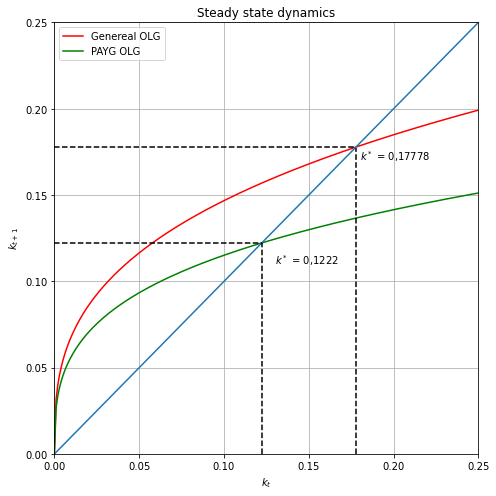

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Steady state dynamics')
ax.plot(k_t, f_gen(k_t), color='red', label='Genereal OLG')
ax.plot(k_payg, f_PAYG(k_payg), color='green', label='PAYG OLG')
ax.plot(k_t, k_t)

# Dashed lines for genereal
ax.axhline(y=0.17778, xmin=0.0, xmax=0.71, color='black', linestyle='dashed')
ax.axvline(x=0.17778, ymin=0.0, ymax=0.71, color='black', linestyle='dashed')

# Dashed lines for PAYG
ax.axhline(y=0.1222, xmin=0.0, xmax=0.49, color='black', linestyle='dashed')
ax.axvline(x=0.1222, ymin=0.0, ymax=0.49, color='black', linestyle='dashed')

plt.grid()
ax.set_xlim([0,0.25])
ax.set_ylim([0,0.25])
ax.set_xlabel('$k_t$')
ax.set_ylabel('$k_{t+1}$')
plt.text(0.18,0.17,'$k^*$ = 0,17778')
plt.text(0.13,0.11,'$k^*$ = 0,1222')
plt.legend()
plt.show()

The above figure shows that the PAYG model has a lower capital level than the genereal model.

To check if any level of $\delta$ and d is able to obatin the capital level of the genereal model we make an interactive plot with these values. $\delta$ and d do not affect the result of the genereal model why the genereal model will be fixed.

In [43]:
f_int_PAYG = lambda k_payg, n, rho, alpha, d, delta: ((1-alpha)*k_payg**alpha*(1-d)-(1-alpha)*k_payg**alpha*d*(((1+rho)*(1+n))/(1+alpha*k_payg**(alpha - 1)-delta)))/((1+n)*(2+rho))

def interactive(k_payg, n, rho, alpha, d, delta):
    #print(f"The analytic solution is {f_PAYG(n_int, rho_int, alpha_int, d, delta_int):.4f}")
    plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.xlabel('k_t')
    plt.ylabel('k_t+1')
    plt.title('PAYG OLG model - change in d and $\delta$')
    plt.xlim([0,0.25]) # fixed x range
    plt.ylim([0,0.25]) # fixed y range
    plt.plot(range(10),range(10), color = 'black')
    plt.plot(k_payg, f_int_PAYG(k_payg, n, rho, alpha, d, delta), color='green', label='PAYG OLG')
    plt.plot(k_t, f_gen(k_t), color='red', label='Genereal OLG')
    plt.legend(loc='upper left')
    plt.grid()

In [44]:
# Making the plot of capital acumulation interactive for d and delta
widgets.interact(interactive,
    k_payg=widgets.fixed(k_payg),             
    n=widgets.fixed(n),
    rho=widgets.fixed(rho),
    alpha=widgets.fixed(alpha),            
    d=widgets.FloatSlider(description="$d$", min=0, max=1, step=0.001, value=0.15),
    delta=widgets.FloatSlider(description="$\delta$", min=-1, max=1, step=0.01, value=0.02),             
);

interactive(children=(FloatSlider(value=0.15, description='$d$', max=1.0, step=0.001), FloatSlider(value=0.02,…

# Conclusion

We have solved the OLG model in the genereal setting and with a pay as you go (PAYG) system. The found value of capital per capita is larger with the general OLG system than in the situation with a PAYG system. This holds for any value of $\delta$ and d. For our rationalized values the genereal solution for $k^*=0.1778$ and for PAYG $k^*_{PAYG}=0.1222$. This is in line with economic theory. In the PAYG system the young transfers money to the old. Therefore the old do not have to save as much money. As they do not save as much capital from period t to t+1 total capital decreases. For $n>\frac{1+r_{t+1}}{1+\delta}$ the consumption will be bigger with the PAYG system than in the genreal model despite less capital accumulates.